### Plot the monthly income for 2023 and 2024

#### Importing the necesary libraries

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

sns.set_theme()

#### Loading the data

In [183]:
data = pd.read_csv('dataset/sales_data.csv')

#### Convert the 'Date' column to 'datetime' type

In [184]:
data['Date'] = pd.to_datetime(data['Date'])

#### Extract the data for a specific year

In [185]:
def get_year(year):

    # get data for a particular year
    one_year_data = data[data['Date'].dt.year == year]
    return one_year_data

In [186]:
# get data for year 2023
year_2023 = get_year(2023)

# get data for year 2024
year_2024 = get_year(2024)

##### Check the resulting year data

In [187]:
year_2024['Date']

1752   2024-01-01
1753   2024-01-01
1754   2024-01-01
1755   2024-01-01
1756   2024-01-01
          ...    
3490   2024-12-29
3491   2024-12-29
3492   2024-12-30
3493   2024-12-31
3494   2024-12-31
Name: Date, Length: 1743, dtype: datetime64[ns]

#### Get data for a specific month

In [188]:
def get_month(month, year_data):

    one_month_data = year_data[year_data['Date'].dt.month == month]
    return one_month_data

##### Testing the 'get_month_revenue()' function

In [189]:
# get data for a particular month from year 2024
one_month_2024 = get_month(2, year_2024)

one_month_2024.head()

,Date,Region,Product_Type,Units_Sold,Client_Type,Sales_Channel,Service_Contract,Customer_Satisfaction,Revenue,Maintenance_Cost
1896,2024-02-01,București,Pallet Truck,1,Corporate,Direct,No,7,5554.89,281.28
1897,2024-02-01,București,Reach Truck,5,Corporate,Direct,Yes,7,100086.07,5174.55
1898,2024-02-02,Timișoara,Order Picker,3,SME,Direct,Yes,7,42798.67,1355.05
1899,2024-02-02,Iași,Order Picker,1,Dealer,Direct,Yes,8,13683.81,703.41
1900,2024-02-02,Timișoara,Order Picker,1,SME,Direct,No,7,13610.69,757.67


#### Get the revenue sum from each month

In [190]:
def get_month_revenue_sum(month, year_data):

    # get the month from the specified year
    month_data = get_month(month, year_data)
    
    # get the revenue sum for the specified month
    month_revenue_sum = np.sum(month_data['Revenue'])

    return month_revenue_sum


##### Test 'get_month_revenue_sum()' function

In [191]:
total_revenue_may_2024 = get_month_revenue_sum(5, year_2024)

print(f'Total revenue from May 2024: {total_revenue_may_2024}')

Total revenue from May 2024: 7674783.1


#### Generate a list with month names

In [192]:
month_names = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

#### Get total revenue from each month in a particular year

In [193]:
def get_monthly_income(year):

    monthly_income = []
    year_data = get_year(year)

    for i in range(1, 13):

        total_month_revenue = get_month_revenue_sum(i, year_data)
        monthly_income.append(total_month_revenue)

    return monthly_income

#### 2023

In [194]:
monthly_income_2023 = get_monthly_income(2023)

In [195]:
print('\nMonthly income in 2023:\n')

for i, month_revenue in enumerate(monthly_income_2023):

    print(f'{month_names[i]} {month_revenue:.0f} EUR')


Monthly income in 2023:

Jan. 7028896 EUR
Feb. 5027612 EUR
Mar. 6855324 EUR
Apr. 6545940 EUR
May. 6668845 EUR
Jun. 7169023 EUR
Jul. 7201176 EUR
Aug. 7206636 EUR
Sep. 6525228 EUR
Oct. 7361606 EUR
Nov. 7800177 EUR
Dec. 6010774 EUR


#### 2024

In [196]:
monthly_income_2024 = get_monthly_income(2024)

In [197]:
print('\nMonthly income in 2024:\n')

for i, month_revenue in enumerate(monthly_income_2024):

    print(f'{month_names[i]} {month_revenue:.0f} EUR')


Monthly income in 2024:

Jan. 6895904 EUR
Feb. 5809431 EUR
Mar. 6158025 EUR
Apr. 6666534 EUR
May. 7674783 EUR
Jun. 6728802 EUR
Jul. 6583485 EUR
Aug. 6660193 EUR
Sep. 7534849 EUR
Oct. 8602850 EUR
Nov. 6341134 EUR
Dec. 7211913 EUR


In [198]:
# Sample DataFrame
income_data = {
    'Month': month_names,
    '2023': monthly_income_2023,
    '2024': monthly_income_2024
}
income_df = pd.DataFrame(income_data)

# Reshape the DataFrame to long format for Seaborn
df_melted = income_df.melt(id_vars=['Month'], value_vars=['2023', '2024'], 
                     var_name = 'Legend', value_name = 'Monthly income in EUR')

#### Make the graphs

In [199]:
def currency_formatter(x, pos):
    
    return f'{x:.0f} EUR'

/var/folders/xy/51wr98g97xn6sv90wcdyfjf40000gn/T/ipykernel_4080/564913005.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  point_plot = sns.pointplot(data=df_melted, x = 'Month', y = 'Monthly income in EUR', hue = 'Legend', dodge = True, palette = 'Oranges', scale = 2.0)


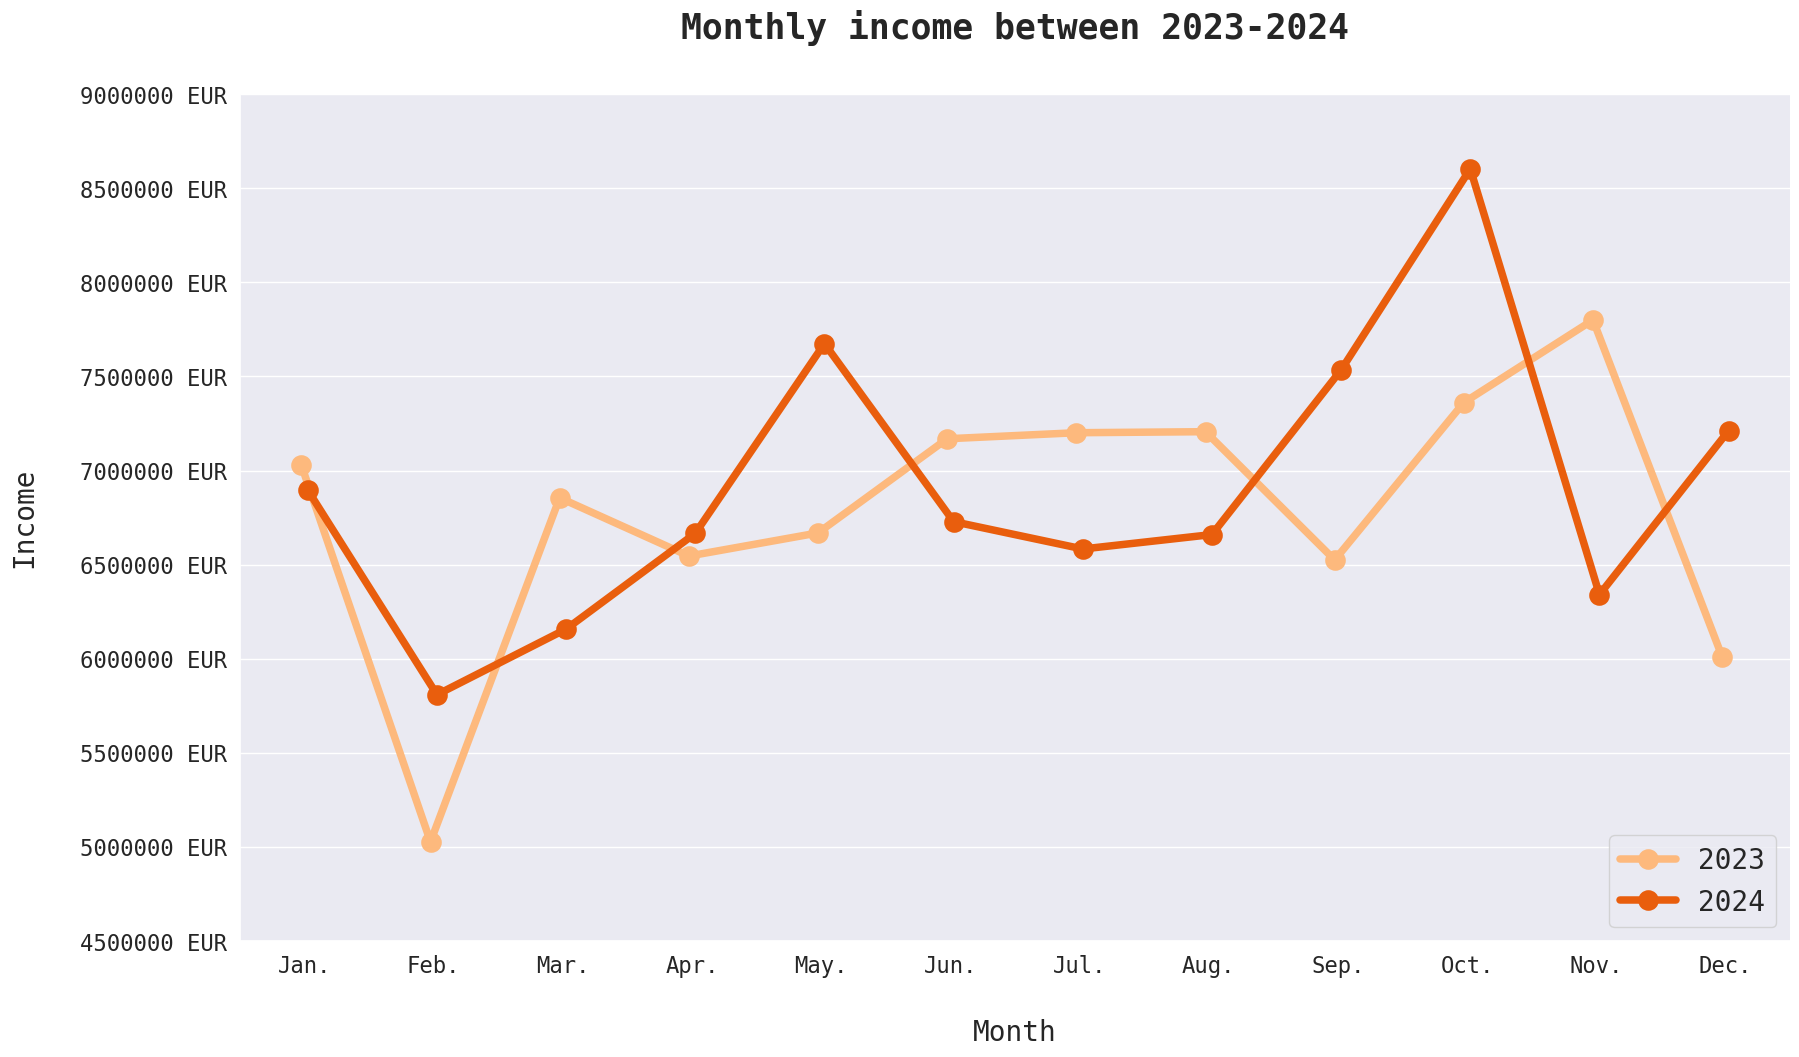

In [200]:
plt.figure(figsize=(20, 11))

plt.rcParams['font.family'] = 'monospace'

# Plot using pointplot
point_plot = sns.pointplot(data=df_melted, x = 'Month', y = 'Monthly income in EUR', hue = 'Legend', dodge = True, palette = 'Oranges', scale = 2.0)

plt.xlabel('Month', fontsize = 20, labelpad = 30)
plt.ylabel('Income', fontsize = 20, labelpad = 30)

plt.title('Monthly income between 2023-2024', fontsize = 25, fontweight = 'bold', pad = 40)

yticks = point_plot.get_yticks()  # Get original y-axis values
point_plot.set_yticks(yticks)  # Set the new y-ticks at the same positions

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'lower right', prop = {'size': 20})

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
# point_plot.set_yticklabels([f"{int(y / 1000000)}" for y in yticks])  # Devide labels by 10

sns.despine()

plt.show()